In [1]:
import matplotlib as mpl
from matplotlib.colors import get_named_colors_mapping
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
import numpy as np
import vice
import sys
print(sys.version_info)
mpl.rcParams["text.usetex"] = True

sys.version_info(major=3, minor=10, micro=13, releaselevel='final', serial=0)


/n/home01/abeane/venv/note/lib/python3.10/site-packages/vice/core/pickles.py:310: UserWarning: Encoding functions along with VICE outputs requires the package dill (installable via pip). The following attribute will not be saved with this output: func
  warnings.warn("""\


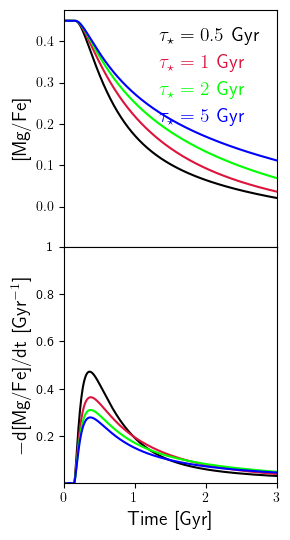

In [6]:
ELEMENTS = ["fe", "mg"]
SFE_TIMESCALES = [0.5, 1, 2, 5] # Gyr -- SFE = 1 / SFE_TIMESCALE
COLORS = ["black", "crimson", "lime", "blue"]
ENDTIME = 10 # Gyr
TIMESTEP_SIZE = 0.01 # Gyr
FONTSIZE = 14


# setup figure
fig = plt.figure(figsize = (3, 5.5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
plt.setp(ax1.get_xticklabels(), visible = False)
ax1.set_ylabel(r"[Mg/Fe]", fontsize = FONTSIZE)
ax2.set_ylabel(r"$-$d[Mg/Fe]/dt [Gyr$^{-1}$]", fontsize = FONTSIZE)
ax2.set_xlabel(r"Time [Gyr]", fontsize = FONTSIZE)
# ax1.set_xlim([0, ENDTIME])
ax1.set_xlim([0, 3])
# ax2.set_yscale("log")
ax2.yaxis.set_major_formatter(fsf("%g"))
ax2.set_ylim([2e-3, 1])


# Magg et al. (2022) solar abundances and yields from Weinberg et al. (2023)
vice.solar_z["mg"] = 6.71e-4
vice.solar_z["fe"] = 13.7e-4
vice.yields.ccsne.settings["mg"] = 6.52e-4
vice.yields.ccsne.settings["fe"] = 4.73e-4
vice.yields.sneia.settings["mg"] = 0
vice.yields.sneia.settings["fe"] = 0.0012


# run the GCE models
for i in range(len(SFE_TIMESCALES)):
    with vice.singlezone(name = "tmp") as sz:
        # Conroy et al. (2022) one-zone model parameters
        sz.elements = ELEMENTS
        sz.mode = "ifr" # sz.func is the accretion rate as opposed to SFR or gas supply as function of time
        sz.func = lambda t: 5 # Msun/year
        sz.Mg0 = 0 # zero gas supply at time t = 0
        sz.tau_star = SFE_TIMESCALES[i] # the timescale we're varying, Mgas / SFR
        sz.eta = 2 # the mass loading factor (outflow rate / SFR)
        sz.dt = TIMESTEP_SIZE
        out = sz.run(np.arange(0, ENDTIME, sz.dt), overwrite = True, capture = True)
    kwargs = {
        "c": get_named_colors_mapping()[COLORS[i]],
        "label": r"$\tau_\star = %g$ Gyr" % (SFE_TIMESCALES[i])
    }
    dmgfe_dt = [(a - b) / TIMESTEP_SIZE for a, b in zip(
        out.history["[mg/fe]"][:-1], out.history["[mg/fe]"][1:])]
    ax1.plot(out.history["time"], out.history["[mg/fe]"], **kwargs)
    ax2.plot(out.history["time"][:-1], dmgfe_dt, **kwargs)

kwargs = {
    "loc": 1,
    "handlelength": 0,
    "frameon": False,
    "fontsize": FONTSIZE
}
leg = ax1.legend(**kwargs)
for i in range(len(COLORS)):
    leg.get_texts()[i].set_color(COLORS[i])
    leg.legend_handles[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.savefig("mgfe-vs-time-sfe-timescales.pdf")
plt.show()

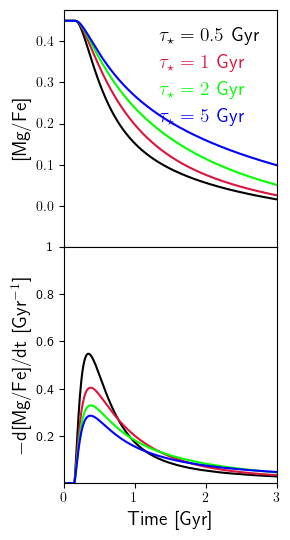

In [14]:
ELEMENTS = ["fe", "mg"]
SFE_TIMESCALES = [0.5, 1, 2, 5] # Gyr -- SFE = 1 / SFE_TIMESCALE
COLORS = ["black", "crimson", "lime", "blue"]
ENDTIME = 10 # Gyr
TIMESTEP_SIZE = 0.01 # Gyr
FONTSIZE = 14


# setup figure
fig = plt.figure(figsize = (3, 5.5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
plt.setp(ax1.get_xticklabels(), visible = False)
ax1.set_ylabel(r"[Mg/Fe]", fontsize = FONTSIZE)
ax2.set_ylabel(r"$-$d[Mg/Fe]/dt [Gyr$^{-1}$]", fontsize = FONTSIZE)
ax2.set_xlabel(r"Time [Gyr]", fontsize = FONTSIZE)
# ax1.set_xlim([0, ENDTIME])
ax1.set_xlim([0, 3])
# ax2.set_yscale("log")
ax2.yaxis.set_major_formatter(fsf("%g"))
ax2.set_ylim([2e-3, 1])


# Magg et al. (2022) solar abundances and yields from Weinberg et al. (2023)
vice.solar_z["mg"] = 6.71e-4
vice.solar_z["fe"] = 13.7e-4
vice.yields.ccsne.settings["mg"] = 6.52e-4
vice.yields.ccsne.settings["fe"] = 4.73e-4
vice.yields.sneia.settings["mg"] = 0
vice.yields.sneia.settings["fe"] = 0.0012


# run the GCE models
for i in range(len(SFE_TIMESCALES)):
    with vice.singlezone(name = "tmp") as sz:
        # Conroy et al. (2022) one-zone model parameters
        sz.elements = ELEMENTS
        sz.mode = "ifr" # sz.func is the accretion rate as opposed to SFR or gas supply as function of time
        sz.func = lambda t: 5 # Msun/year
        sz.Mg0 = 0 # zero gas supply at time t = 0
        sz.tau_star = SFE_TIMESCALES[i] # the timescale we're varying, Mgas / SFR
        sz.eta = 3 # the mass loading factor (outflow rate / SFR)
        sz.dt = TIMESTEP_SIZE
        out = sz.run(np.arange(0, ENDTIME, sz.dt), overwrite = True, capture = True)
    kwargs = {
        "c": get_named_colors_mapping()[COLORS[i]],
        "label": r"$\tau_\star = %g$ Gyr" % (SFE_TIMESCALES[i])
    }
    dmgfe_dt = [(a - b) / TIMESTEP_SIZE for a, b in zip(
        out.history["[mg/fe]"][:-1], out.history["[mg/fe]"][1:])]
    ax1.plot(out.history["time"], out.history["[mg/fe]"], **kwargs)
    ax2.plot(out.history["time"][:-1], dmgfe_dt, **kwargs)

kwargs = {
    "loc": 1,
    "handlelength": 0,
    "frameon": False,
    "fontsize": FONTSIZE
}
leg = ax1.legend(**kwargs)
for i in range(len(COLORS)):
    leg.get_texts()[i].set_color(COLORS[i])
    leg.legend_handles[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.savefig("mgfe-vs-time-sfe-timescales.pdf")
plt.show()